In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Veri setinin yüklenmesi

In [3]:
df = pd.read_csv("/workspace/DeepLearningFundamentals/Dokumanlar/02_MachineLearning/data/diabetes.csv")

#### Veri Setini Keşfedelim

head and tail

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [5]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.340,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1
768,1,93,70,31,0,30.4,0.315,23,0


info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               769 non-null    int64  
 1   Glucose                   769 non-null    int64  
 2   BloodPressure             769 non-null    int64  
 3   SkinThickness             769 non-null    int64  
 4   Insulin                   769 non-null    int64  
 5   BMI                       769 non-null    float64
 6   DiabetesPedigreeFunction  769 non-null    float64
 7   Age                       769 non-null    int64  
 8   Outcome                   769 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.2 KB


describe

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000
mean,3.847854,120.929779,69.109233,20.555267,79.695709,31.994668,0.472078,33.262679,0.349805
std,3.368280,31.966743,19.343483,15.950358,115.204894,7.879239,0.331160,11.768101,0.477219
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,29.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,127.000000,36.600000,0.627000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Boş verilerin temizlenmesi (Handling Missing Data)

boş verilerin tespit edilmesi

In [8]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

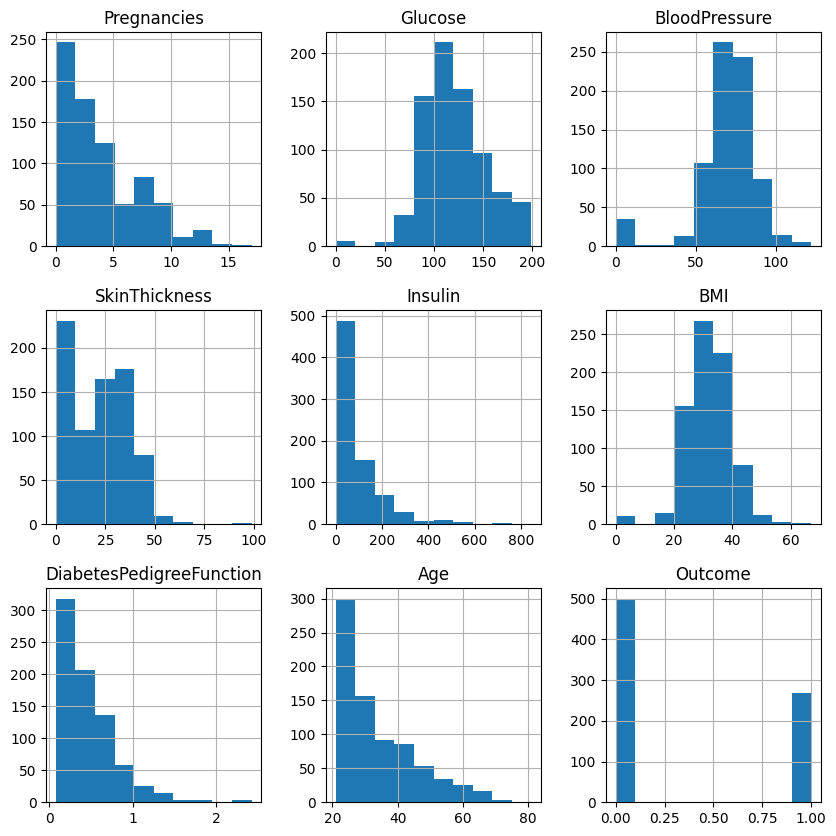

In [9]:
df.hist(figsize=(10,10));

In [10]:
# BMI
columnName = "BMI"
df[columnName] = df[columnName].replace(value=df[columnName].mean(),to_replace=0)
# BloodPressure
columnName = "BloodPressure"
df[columnName] = df[columnName].replace(value=df[columnName].mean(),to_replace=0)
# Insulin
columnName = "Insulin"
df[columnName] = df[columnName].replace(value=df[columnName].mean(),to_replace=0)
# Glucose
columnName = "Glucose"
df[columnName] = df[columnName].replace(value=df[columnName].mean(),to_replace=0)
# SkinThickness
columnName = "SkinThickness"
df[columnName] = df[columnName].replace(value=df[columnName].mean(),to_replace=0)

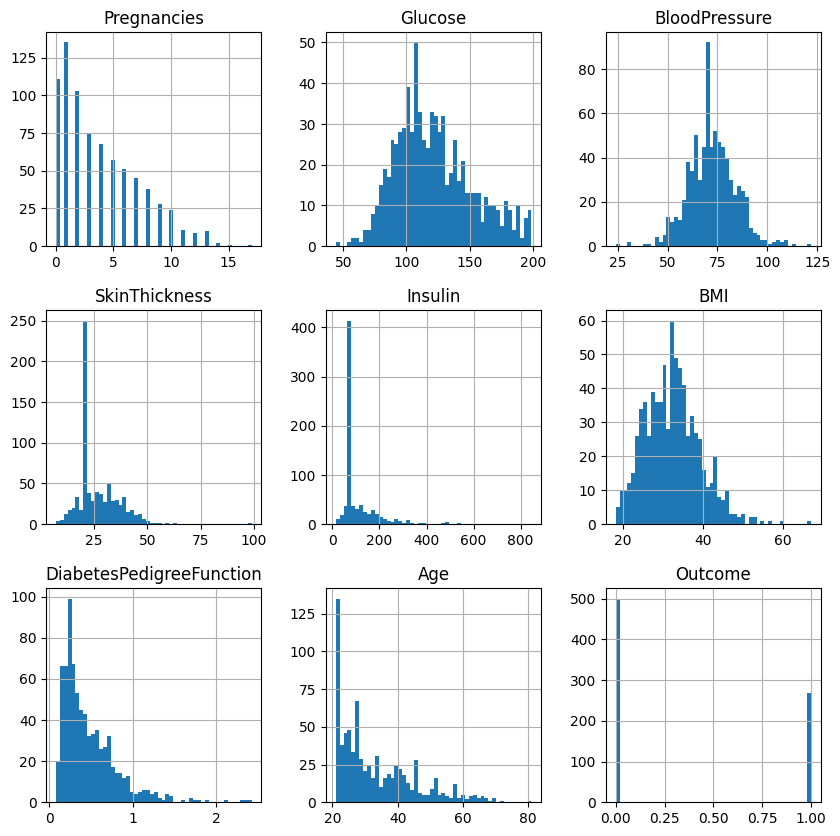

In [11]:
df.hist(figsize=(10,10),bins=50);

boşverilerin temizlenmesi (Boş veri Yok ise boş geçilebilir)

#### Kategorik verilerin dönüştürülmesi (Encoding Data)

Veri Tiplerinin Tespiti

In [12]:
df.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Verilerin Dönüştürülmesi (Yok ise boş geçilebilir)

#### Aykırı Verilerin Tespiti


Verilerin dağılım grafiği ile tespit edilmesi

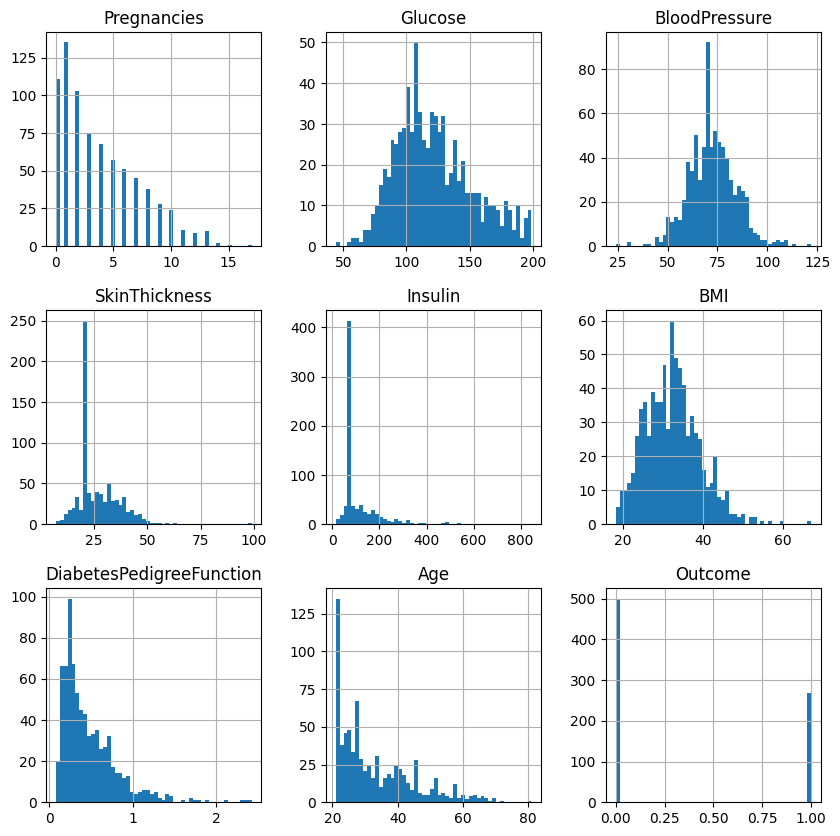

In [13]:
df.hist(figsize=(10,10),bins=50);

In [14]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000
mean,3.847854,121.716058,72.254646,26.622946,118.559026,32.452329,0.472078,33.262679,0.349805
std,3.368280,30.430991,12.108000,9.626219,93.051444,6.871019,0.331160,11.768101,0.477219
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,20.555267,79.695709,27.500000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.695709,32.000000,0.374000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,127.000000,36.600000,0.627000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Verilerin IQR yöntemi ile tespit edilip kaldırılması

In [15]:
out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    return df[~((df<Lower_tail) | (df>Upper_tail)).any(axis=1)]
    # df2 = df[~df.isin("aykırıdeğerler")].dropna()
df_clean = iqr_outliers(df)

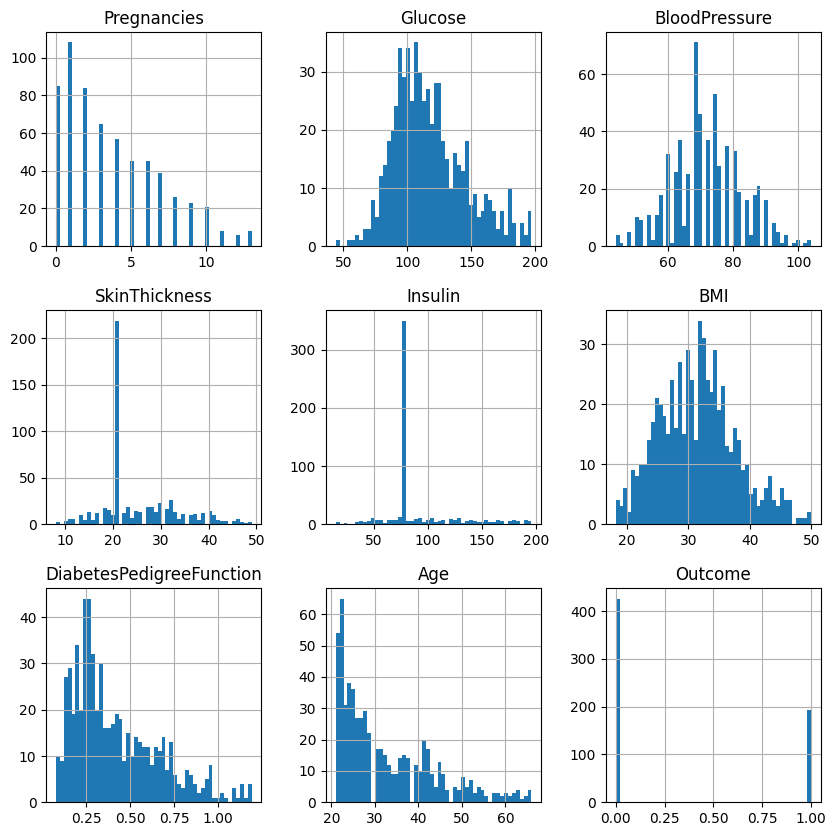

In [17]:
df_clean.hist(figsize=(10,10),bins=50);

In [18]:
out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    # return df[~((df<Lower_tail) | (df>Upper_tail)).any(axis=1)]
    return  df[~df.isin(out)].dropna(axis=0)
dfclean = df.copy()

dfclean["Age"] = iqr_outliers(df["Age"])

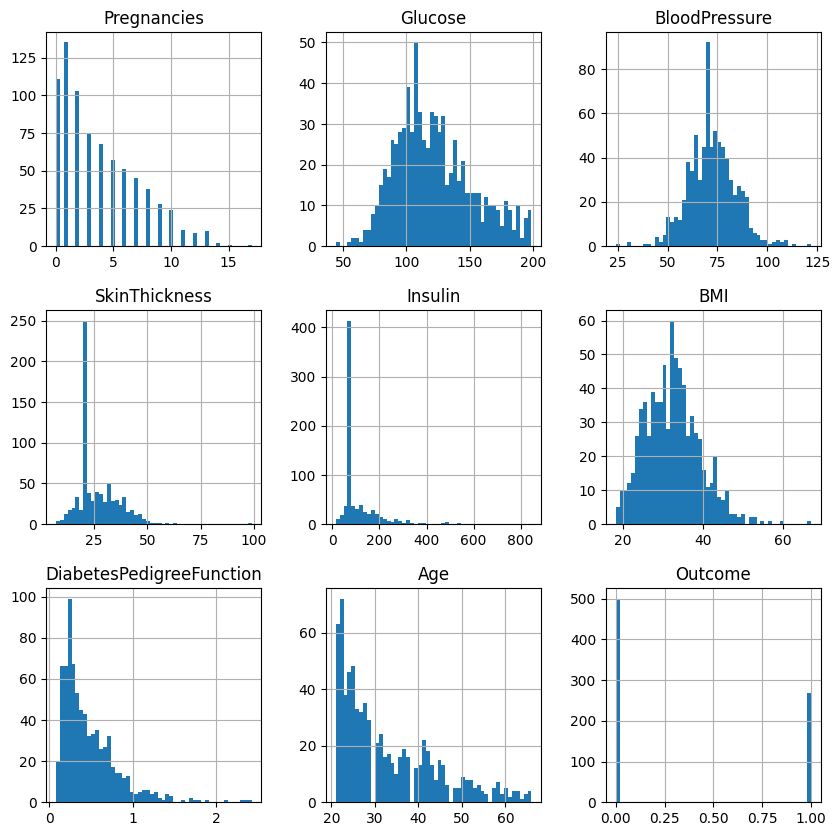

In [19]:
dfclean.hist(figsize=(10,10),bins=50);

In [20]:
df_clean.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000
mean,3.800000,117.360724,71.625169,25.271945,91.573103,31.554761,0.416702,32.529032,0.312903
std,3.229308,28.136884,10.950296,8.201505,33.773815,6.225275,0.244812,10.994232,0.464050
min,0.000000,44.000000,44.000000,8.000000,15.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,97.000000,64.000000,20.555267,79.695709,27.000000,0.236750,24.000000,0.000000
50%,3.000000,112.000000,70.000000,20.555267,79.695709,31.600000,0.340000,29.000000,0.000000
75%,6.000000,133.000000,78.000000,31.000000,94.000000,35.325000,0.566000,40.000000,1.000000
max,13.000000,197.000000,104.000000,49.000000,196.000000,50.000000,1.191000,66.000000,1.000000


#### Etiket Verisi varsa veri setinden ayrılması

In [24]:
y= df_clean["Outcome"].values
X= df_clean.drop("Outcome",axis=1)

#### Eğitim ve Test Setinin Birbirinden Ayrılması

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

#### Veri Ölçeklendirme işleminin gerçekleştirilmesi

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_scaled =  sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

In [ ]:
##Kfold

In [27]:
from sklearn.model_selection import KFold
kfold = KFold(5,shuffle=True)

In [ ]:
##Model Nasıl Eğitilir

In [28]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_scaled,y_train)
y_preds = model.predict(X_test_scaled)
model.score(X_test_scaled,y_test)

0.7338709677419355

In [ ]:
##Cross Validation

In [29]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.neighbors import KNeighborsClassifier
kfold = KFold(n_splits=5,shuffle=True)
model = KNeighborsClassifier()
cross_val_score(model,X_train_scaled,y_train,cv=kfold)

array([0.75      , 0.74747475, 0.68686869, 0.74747475, 0.81818182])

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor

In [31]:
seed = 7
result = []
names = []
models = []
models.append(('LR',LogisticRegression()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVC',SVC()))
models.append(('LSVC',LinearSVC()))
models.append(('RFC',RandomForestClassifier()))
models.append(('DTR',DecisionTreeRegressor()))
models

[('LR', LogisticRegression()),
 ('KNN', KNeighborsClassifier()),
 ('NB', GaussianNB()),
 ('SVC', SVC()),
 ('LSVC', LinearSVC()),
 ('RFC', RandomForestClassifier()),
 ('DTR', DecisionTreeRegressor())]

In [32]:
import warnings
warnings.filterwarnings("ignore")
for name,model in models:
    kfold = KFold(n_splits=5,random_state=7,shuffle=True)
    cv_results = cross_val_score(model,X_train_scaled,y_train,cv=kfold,scoring="accuracy")
    result.append(cv_results)
    names.append(name)
    msg = f"{name} {cv_results.mean()} {cv_results.std()}"
    print(msg)

LR 0.7722020202020202 0.021462723621538952
KNN 0.7581616161616161 0.04069774061560644
NB 0.7661414141414141 0.007088117094008368
SVC 0.7541212121212121 0.03848982708590872
LSVC 0.7762626262626262 0.02278891752056259
RFC 0.758141414141414 0.03828341994692173
DTR 0.6814545454545454 0.03031175631939209


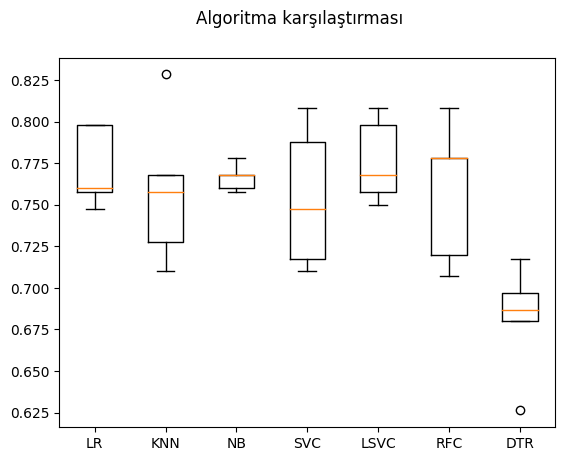

In [33]:
fig = plt.figure()
fig.suptitle("Algoritma karşılaştırması")
ax = fig.add_subplot(111)
plt.boxplot(result)
ax.set_xticklabels(names)
plt.show()